In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('zomato.csv')
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [177]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [178]:
df.shape

(51717, 17)

In [179]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [181]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [182]:
df.drop_duplicates(inplace = True)
df.shape

(51717, 17)

In [183]:
df['rate'] = df['rate'].str.extract(r'(\d+\.\d+)')
df['rate'] = df['rate'].astype(float)

In [184]:
df['rate'].isnull().sum()

10052

In [185]:
df['rate'].fillna(df['rate'].mean(), inplace = True)
df['rate'].isnull().sum()

0

In [186]:
df['dish_liked'] = df['dish_liked'].fillna('none')
df['dish_liked'].isnull().sum()

0

In [187]:
df.dropna(inplace = True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [188]:
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [189]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [190]:
df = df.drop(['url','phone','reviews_list', 'menu_item', 'address','listed_in(city)', 'dish_liked'], axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [191]:
df.rename(columns={'approx_cost(for two people)':'cost for two','listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [192]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli',
       'Wilson Garden', 'Shanti Nagar', 'Koramangala 5th Block',
       'Koramangala 8th Block', 'Richmond Road', 'Koramangala 7th Block',
       'Jalahalli', 'Koramangala 4th Block', 'Bellandur', 'Sarjapur Road',
       'Whitefield', 'East Bangalore', 'Old Airport Road', 'Indiranagar',
       'Koramangala 1st Block', 'Frazer Town', 'RT Nagar', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan Bhima Nagar', 'Old 

In [193]:
df['cost for two'] = df['cost for two'].str.replace(',', '').astype(float)

In [194]:
df['cost for two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [195]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [196]:
df['rest_type'].value_counts()

Quick Bites                   18635
Casual Dining                 10232
Cafe                           3609
Delivery                       2514
Dessert Parlor                 2202
                              ...  
Dessert Parlor, Food Court        2
Cafe, Food Court                  2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Bakery, Food Court                1
Name: rest_type, Length: 91, dtype: int64

In [197]:
rest_types = df['rest_type'].value_counts(ascending = False)
rest_types

Quick Bites                   18635
Casual Dining                 10232
Cafe                           3609
Delivery                       2514
Dessert Parlor                 2202
                              ...  
Dessert Parlor, Food Court        2
Cafe, Food Court                  2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Bakery, Food Court                1
Name: rest_type, Length: 91, dtype: int64

In [198]:
rest_types_lessthan1000 = rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 846
Bar                           676
Food Court                    579
Sweet Shop                    465
Bar, Casual Dining            407
                             ... 
Dessert Parlor, Food Court      2
Cafe, Food Court                2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Bakery, Food Court              1
Name: rest_type, Length: 83, dtype: int64

In [199]:
def handling_rest_types(x):
    if(x in rest_types_lessthan1000):
       return 'Others'
    else:
        return x
    

In [200]:
df['rest_type'] = df['rest_type'].apply(handling_rest_types)
df['rest_type'].value_counts()

Quick Bites           18635
Casual Dining         10232
Others                 8855
Cafe                   3609
Delivery               2514
Dessert Parlor         2202
Takeaway, Delivery     1980
Casual Dining, Bar     1131
Bakery                 1121
Name: rest_type, dtype: int64

In [201]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [202]:
df['location'].value_counts()

BTM                      4981
HSR                      2479
Koramangala 5th Block    2446
JP Nagar                 2200
Whitefield               2079
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [203]:
location = df['location'].value_counts(ascending = False)
location_lessthan300 = location[location<300]

In [204]:
def handling_location(x):
    if (x in location_lessthan300):
       return 'Others'
    else:
     return x

In [205]:
df['location'] = df['location'].apply(handling_location)
df['location'].value_counts()

BTM                      4981
Others                   4879
HSR                      2479
Koramangala 5th Block    2446
JP Nagar                 2200
Whitefield               2079
Indiranagar              2001
Jayanagar                1872
Marathahalli             1786
Bannerghatta Road        1591
Bellandur                1237
Koramangala 1st Block    1236
Electronic City          1235
Brigade Road             1196
Koramangala 7th Block    1134
Koramangala 6th Block    1116
Sarjapur Road            1044
Ulsoor                    995
Koramangala 4th Block     994
Banashankari              898
MG Road                   876
Kalyan Nagar              834
Richmond Road             747
Malleshwaram              703
Residency Road            674
Frazer Town               671
Basavanagudi              669
Brookefield               652
New BEL Road              641
Kammanahalli              635
Banaswadi                 627
Rajajinagar               584
Church Street             552
Lavelle Ro

In [206]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [207]:
cuisines = df['cuisines'].value_counts(ascending = False)
cuisines_lessthan100 = cuisines[cuisines<100]

In [208]:
def handling_cuisines(x):
    if(x in cuisines_lessthan100):
        return 'Others'
    else:
        return x
    

In [209]:
df['cuisines'] = df['cuisines'].apply(handling_cuisines)
df['cuisines'].value_counts()

Others                                 25964
North Indian                            2775
North Indian, Chinese                   2349
South Indian                            1741
Biryani                                  890
                                       ...  
Cafe, Desserts                           104
North Indian, Mughlai, Chinese           104
South Indian, Chinese, North Indian      104
South Indian, Fast Food                  102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 69, dtype: int64

In [210]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,Others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,Others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,Others,600.0,Buffet


In [211]:
df['Type'].value_counts()

Delivery              25269
Dine-out              17270
Desserts               3457
Cafes                  1663
Drinks & nightlife     1077
Buffet                  870
Pubs and bars           673
Name: Type, dtype: int64

In [212]:
df['location'].value_counts()


BTM                      4981
Others                   4879
HSR                      2479
Koramangala 5th Block    2446
JP Nagar                 2200
Whitefield               2079
Indiranagar              2001
Jayanagar                1872
Marathahalli             1786
Bannerghatta Road        1591
Bellandur                1237
Koramangala 1st Block    1236
Electronic City          1235
Brigade Road             1196
Koramangala 7th Block    1134
Koramangala 6th Block    1116
Sarjapur Road            1044
Ulsoor                    995
Koramangala 4th Block     994
Banashankari              898
MG Road                   876
Kalyan Nagar              834
Richmond Road             747
Malleshwaram              703
Residency Road            674
Frazer Town               671
Basavanagudi              669
Brookefield               652
New BEL Road              641
Kammanahalli              635
Banaswadi                 627
Rajajinagar               584
Church Street             552
Lavelle Ro

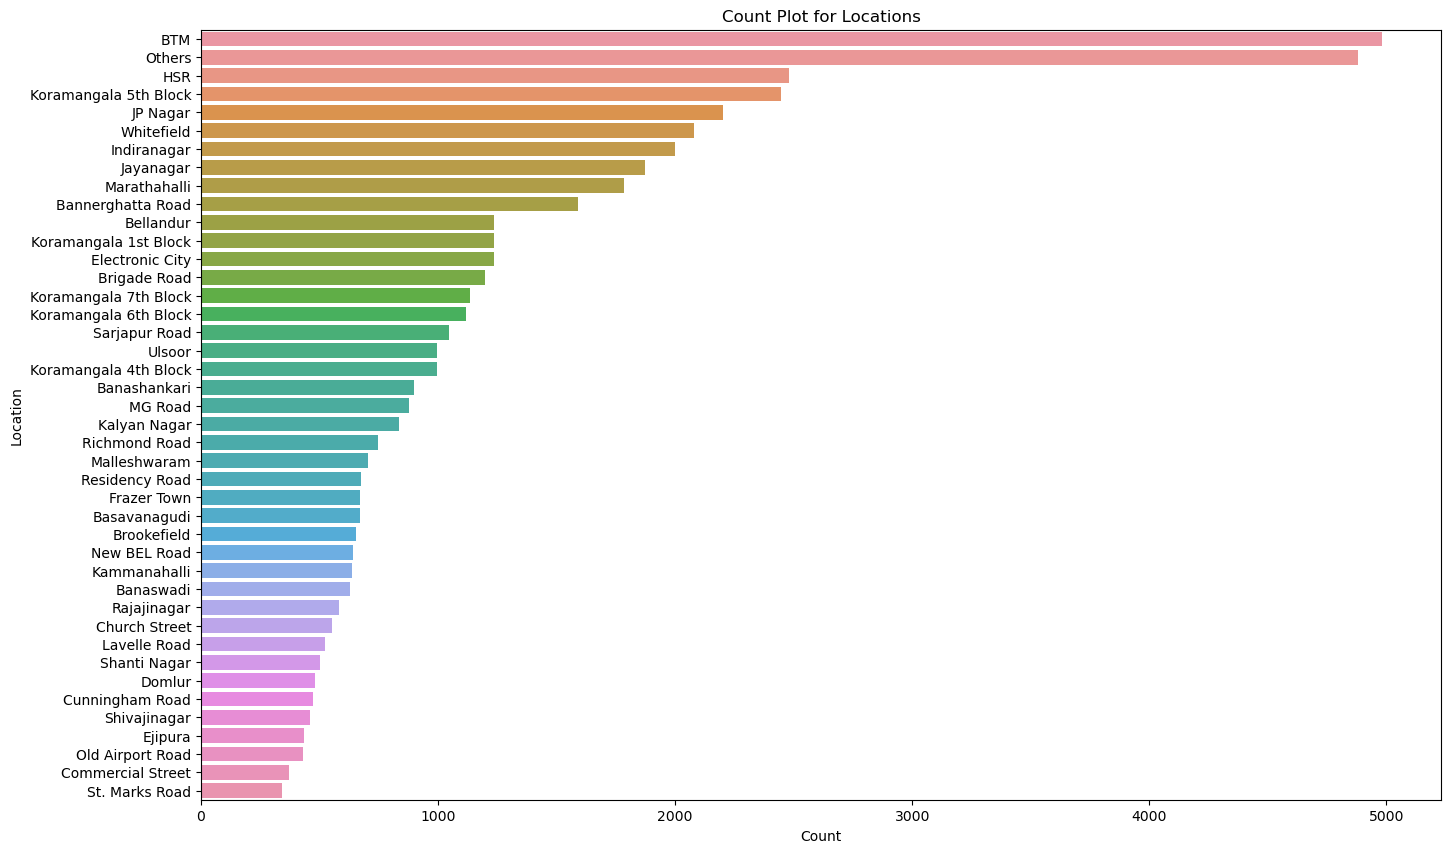

In [226]:

# Set the figure size
plt.figure(figsize=(16, 10))

# Create a count plot for the 'location' column
sns.countplot(y='location', data=df, order=df['location'].value_counts().index)

# Set the title and labels
plt.title('Count Plot for Locations')
plt.xlabel('Count')
plt.ylabel('Location')

# Show the plot
plt.show()


<Axes: xlabel='online_order', ylabel='count'>

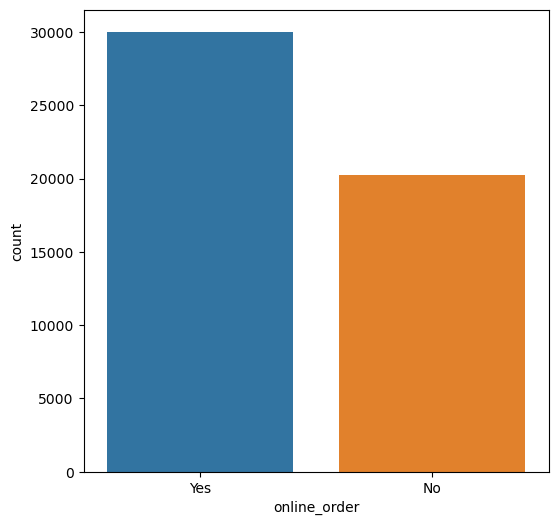

In [224]:
plt.figure(figsize = (6,6))
sns.countplot(x='online_order', data=df, order=df['online_order'].value_counts().index)

<Axes: xlabel='book_table', ylabel='count'>

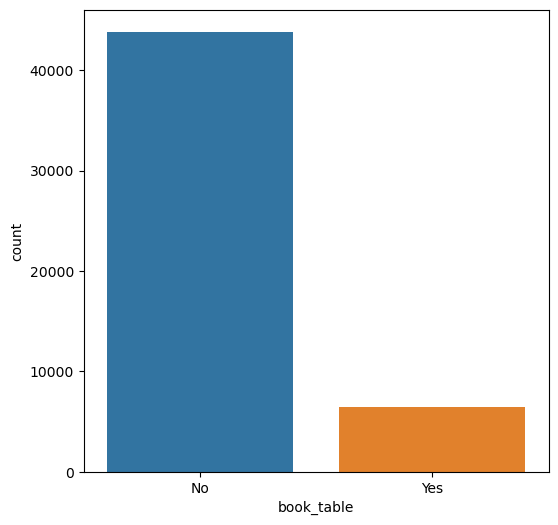

In [227]:
plt.figure(figsize = (6,6))
sns.countplot(x='book_table', data=df, order=df['book_table'].value_counts().index)

<Axes: xlabel='online_order', ylabel='rate'>

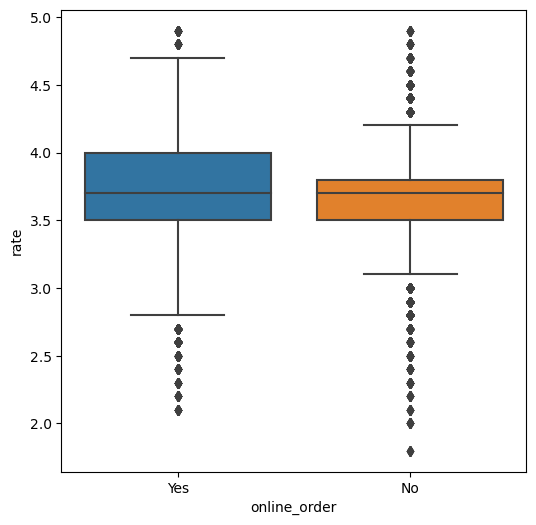

In [231]:
plt.figure(figsize = (6,6))
sns.boxplot(x ='online_order', y = 'rate', data=df)

<Axes: xlabel='book_table', ylabel='rate'>

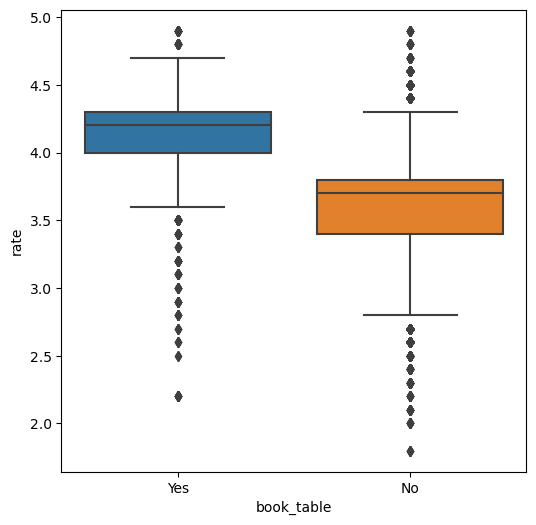

In [232]:
plt.figure(figsize = (6,6))
sns.boxplot(x ='book_table', y = 'rate', data=df)

In [245]:
location_online_order = df.groupby(['location', 'online_order']).size().unstack(fill_value=0)
location_online_order.columns = ['No', 'Yes']
print(location_online_order)


                         No   Yes
location                         
BTM                    1724  3257
Banashankari            391   507
Banaswadi               288   339
Bannerghatta Road       671   920
Basavanagudi            235   434
Bellandur               497   740
Brigade Road            535   661
Brookefield             239   413
Church Street           209   343
Commercial Street       227   142
Cunningham Road         161   313
Domlur                  247   235
Ejipura                 214   220
Electronic City         665   570
Frazer Town             255   416
HSR                     573  1906
Indiranagar             681  1320
JP Nagar                896  1304
Jayanagar               523  1349
Kalyan Nagar            343   491
Kammanahalli            260   375
Koramangala 1st Block   384   852
Koramangala 4th Block   448   546
Koramangala 5th Block   837  1609
Koramangala 6th Block   433   683
Koramangala 7th Block   359   775
Lavelle Road            316   206
MG Road       

<Axes: xlabel='location'>

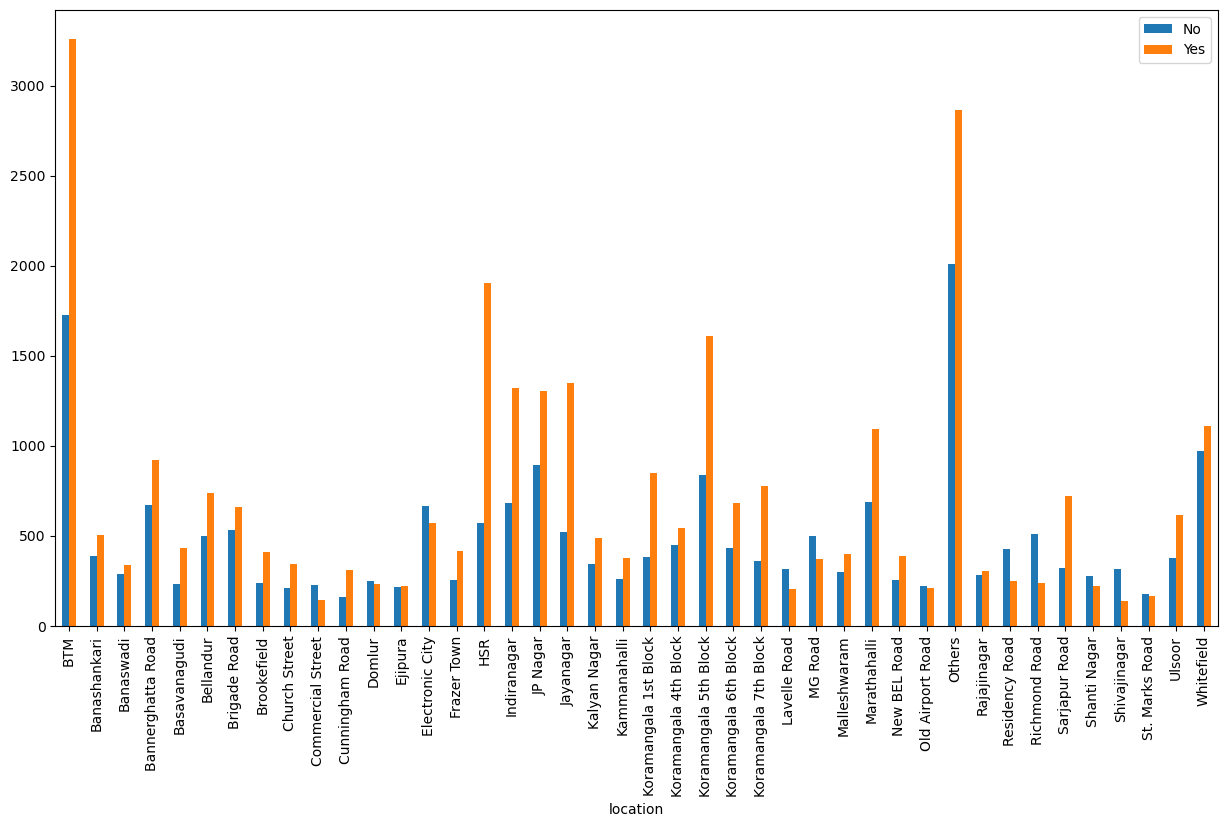

In [246]:
location_online_order.plot(kind= 'bar', figsize = (15,8))

In [247]:
location_book_table = df.groupby(['location','book_table']).size().unstack(fill_value=0)
location_book_table.columns = ['No', 'Yes']
location_book_table

,No,Yes
location,,
BTM,4813,168
Banashankari,834,64
Banaswadi,619,8
Bannerghatta Road,1492,99
Basavanagudi,653,16
Bellandur,1139,98
Brigade Road,1017,179
Brookefield,578,74
Church Street,370,182


<Axes: xlabel='location'>

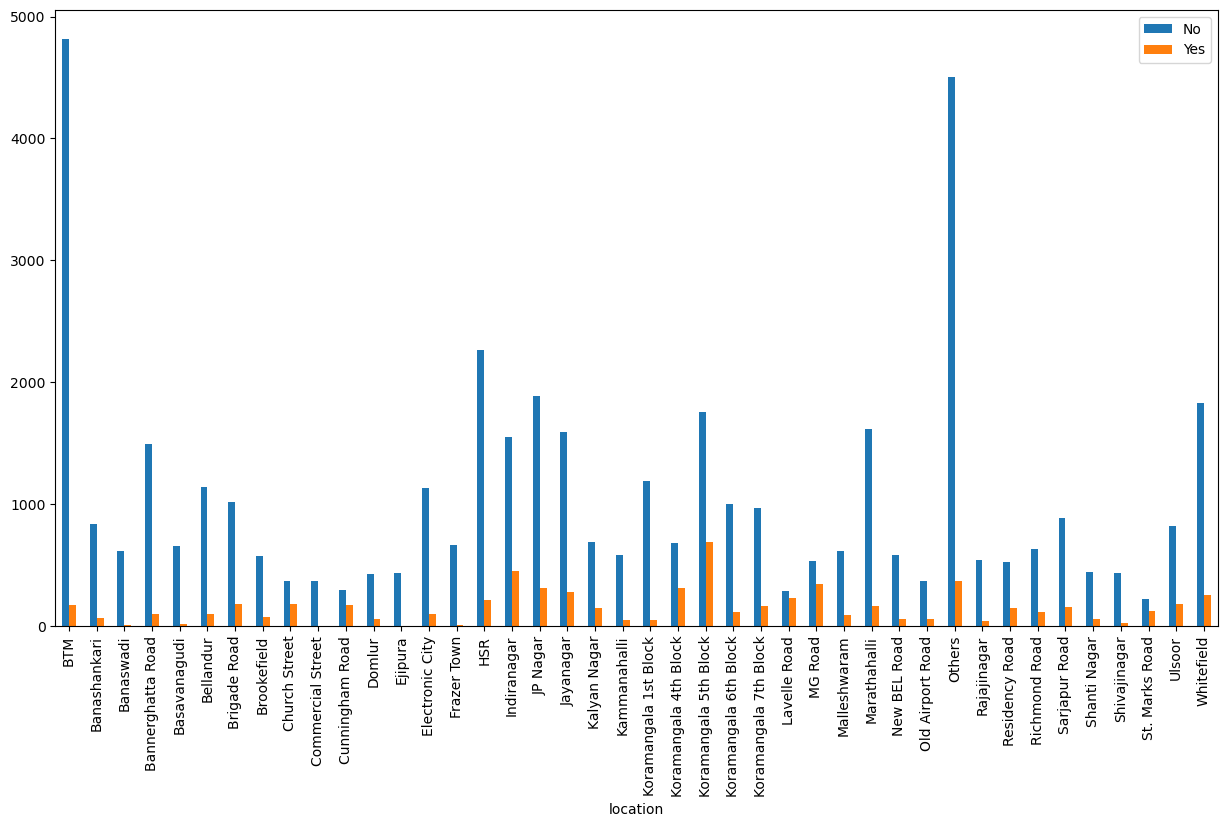

In [248]:
location_book_table.plot(kind= 'bar', figsize = (15,8))

<Axes: xlabel='Type', ylabel='rate'>

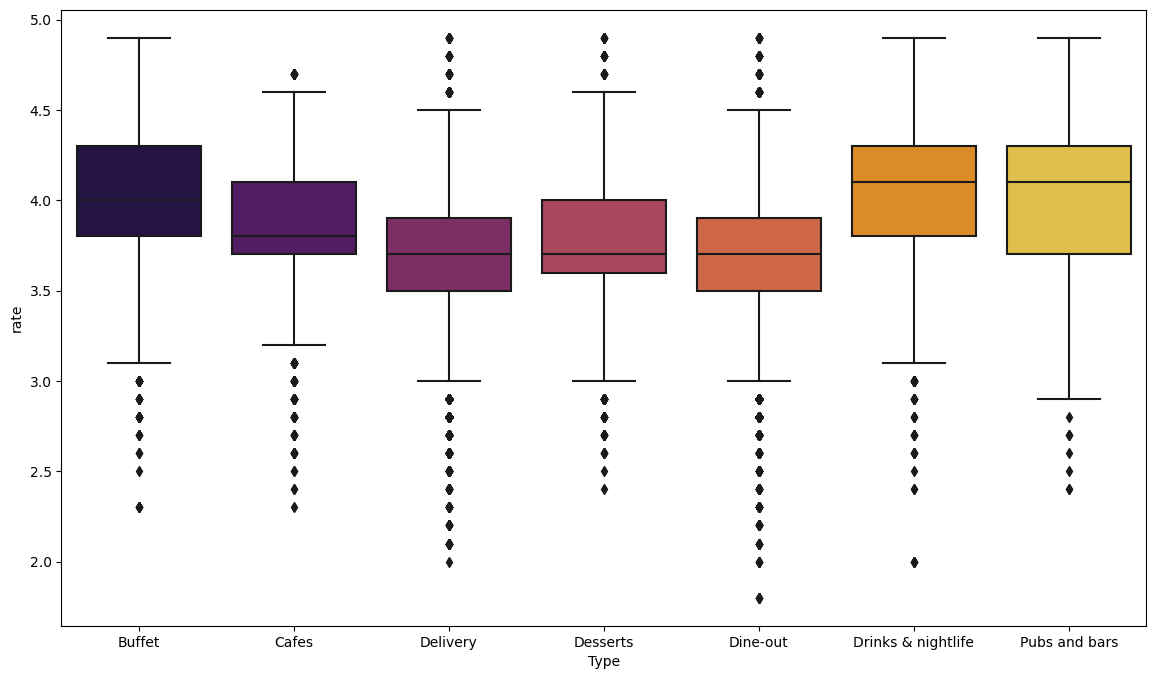

In [249]:
plt.figure(figsize = (14,8))
sns.boxplot(x = "Type", y = 'rate', data = df, palette = 'inferno')

In [251]:
location_rest_type = df.groupby(['location', 'Type']).size().unstack(fill_value=0)
location_rest_type

Type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,21,83,3016,190,1630,22,19
Banashankari,7,36,418,71,352,14,0
Banaswadi,0,24,304,32,260,6,1
Bannerghatta Road,9,45,824,132,570,9,2
Basavanagudi,7,11,337,66,243,5,0
Bellandur,28,35,606,69,466,17,16
Brigade Road,25,46,497,103,445,58,22
Brookefield,6,17,337,45,243,4,0
Church Street,19,45,195,27,215,31,20


<Axes: xlabel='location'>

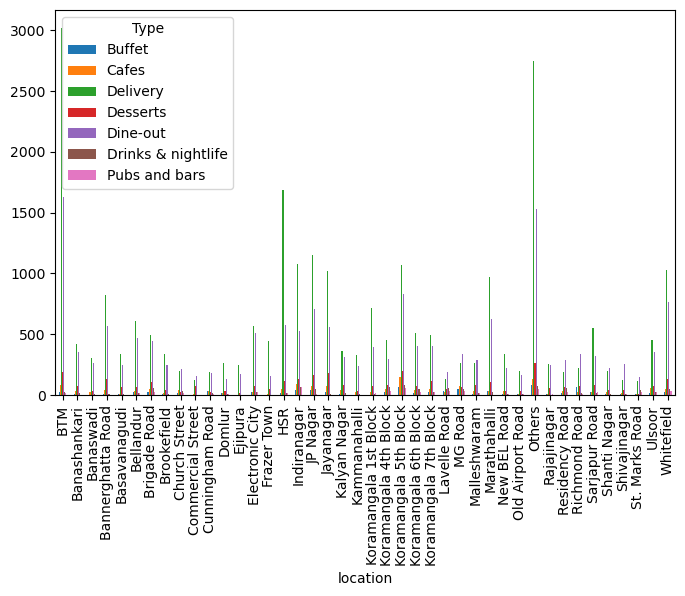

In [259]:
location_rest_type.plot(kind= 'bar', figsize = (8,5))

In [267]:
votes_by_location = df.groupby('location')['votes'].sum().sort_values(ascending=False)

print(votes_by_location)


location
Koramangala 5th Block    2208283
Indiranagar              1160672
Koramangala 4th Block     660621
Church Street             594083
JP Nagar                  585120
Others                    564391
BTM                       545720
Lavelle Road              504989
HSR                       485430
Koramangala 7th Block     485301
Jayanagar                 480268
Whitefield                458634
Koramangala 6th Block     458209
Marathahalli              440210
Brigade Road              429458
MG Road                   419812
Sarjapur Road             404097
Residency Road            291945
Cunningham Road           287458
St. Marks Road            266099
Koramangala 1st Block     251717
Malleshwaram              228697
Bannerghatta Road         213480
Bellandur                 201220
Ulsoor                    180737
New BEL Road              175329
Kalyan Nagar              167712
Banashankari              162303
Old Airport Road          137635
Brookefield               118962
R

<Axes: xlabel='location'>

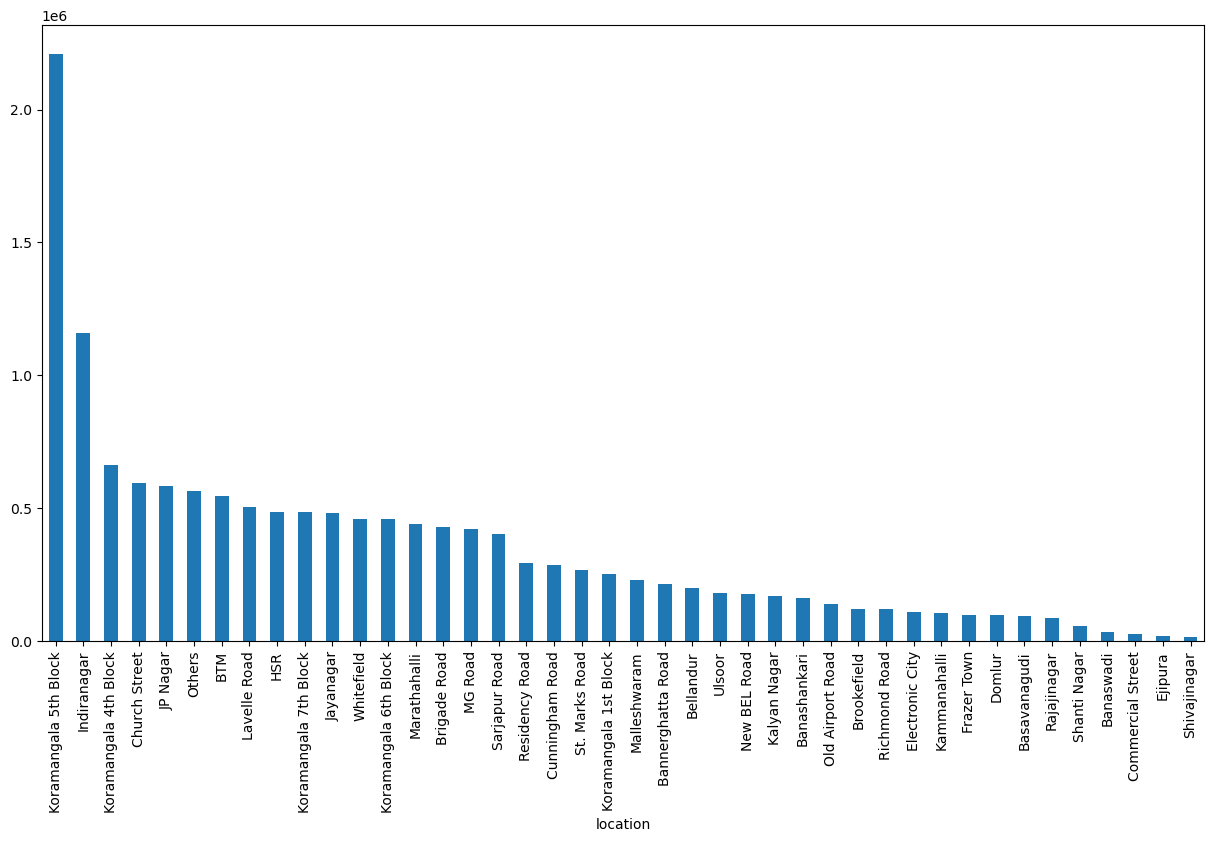

In [268]:
votes_by_location.plot(kind= 'bar', figsize = (15,8))

In [272]:
cuisine_votes = df.groupby('cuisines')['votes'].sum().sort_values(ascending=False)

cuisine_votes = cuisine_votes[1:]
cuisine_votes

cuisines
North Indian                           508853
North Indian, Chinese                  255042
South Indian                           160965
North Indian, Mughlai                  103738
Chinese                                101693
                                        ...  
Biryani, South Indian                    6473
Fast Food, Beverages                     5914
Kerala, South Indian                     5795
South Indian, Chinese, North Indian      2888
Mithai                                   2029
Name: votes, Length: 68, dtype: int64

<Axes: xlabel='cuisines'>

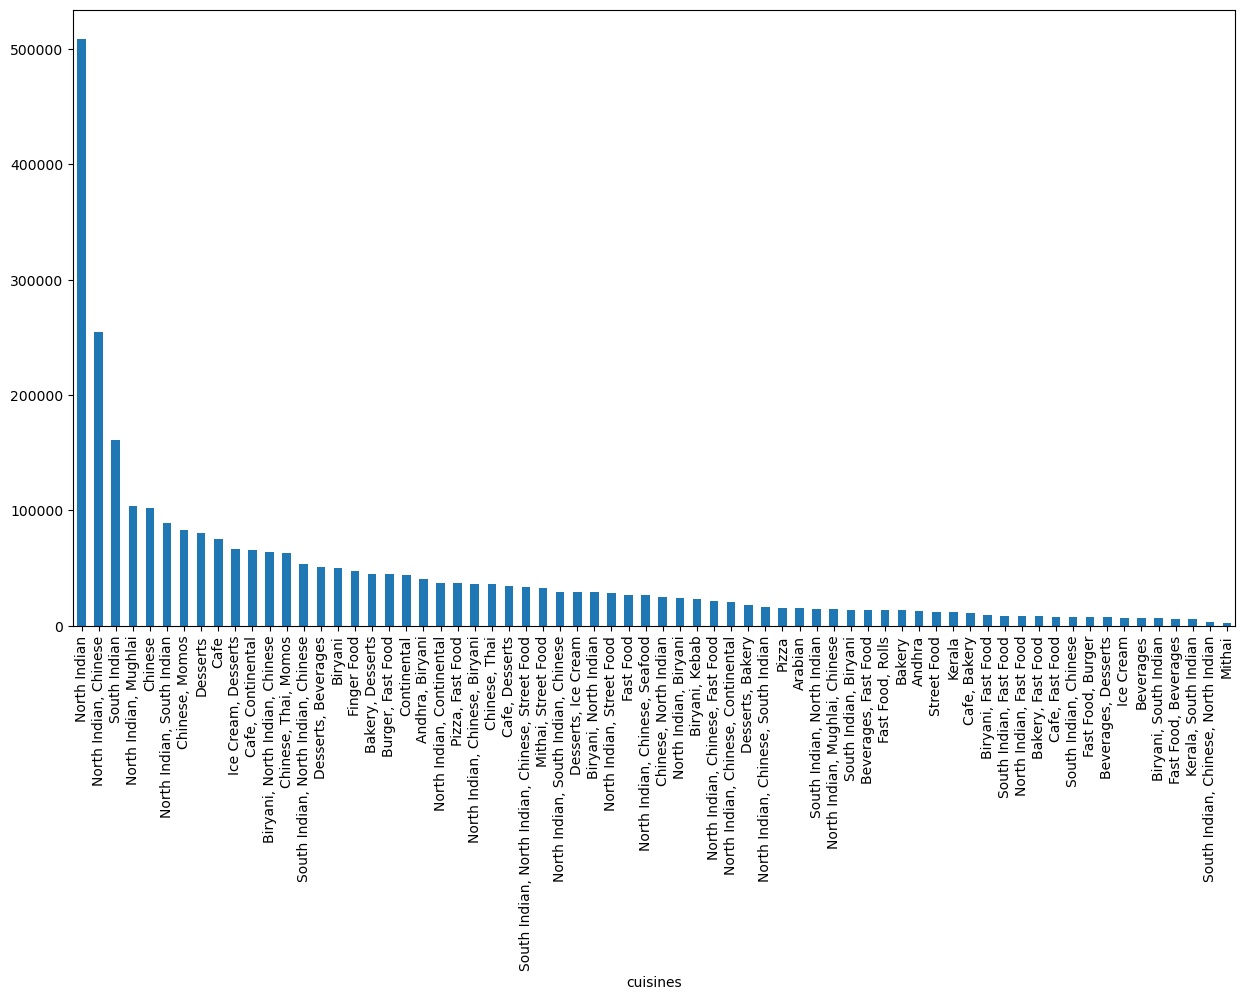

In [273]:
cuisine_votes.plot(kind= 'bar', figsize = (15,8))

In [4]:
df.to_csv('zomato.csv', index=False)
